# Hypothesis Testing
In this project we will explore the principles and processes involved in hypothesis testing using the case study given below

#### Case Study: ####
You receive a new email from Sylvester Esperanza, your project manager. Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of drives and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of drive data based on device type. In particular, leadership wants to know if there is a statistically significant difference in mean amount of drives between iPhone® users and Android™ users. A final email from Chidi includes your specific assignment: to conduct a two-sample hypothesis test (t-test) to analyze the difference in the mean amount of drives between iPhone users and Android users.


In this activity, we will explore the data provided and conduct a hypothesis test.
<br/>

**The purpose** of this project is to demostrate knowledge of how to conduct a two-sample hypothesis test.

**The goal** is to apply descriptive statistics and hypothesis testing in Python.
<br/>

*This activity has three tasks:*

**Task 1:** Imports and Data loading

**Task 2:** Data Exploration and  Cleaning


**Task 3:** Statistical Tests

### **Task 1. Imports and data loading**




Import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [67]:
# Import any relevant packages or libraries
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [68]:
# Load dataset into dataframe
waze_df = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\waze_dataset.csv')

### **Task 2. Data exploration**

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where you can always refer back to if needed.

In [69]:
waze_df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [70]:
waze_df.shape

(14999, 13)

Generate summary statistics using the `describe()` method.

In [71]:
waze_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


And summary information using the `info()` method.

In [72]:
waze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


Check for missing data, duplicates and outliers and handle them accordingly


In [73]:
waze_df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Only `label` column has missing values, totalling 700 rows.
`label` column is not relevant to this project. Both `device` and `drives` columns have no missing values, so we have no need for dropping missing values.

Check for number of duplicates using the `duplicated()` method

In [39]:
waze_df.duplicated().sum()

0

Check for outliers using box plots

Only our `drives` column is the numerical column relevant to our hypothesis test so we will only be creating a single plot

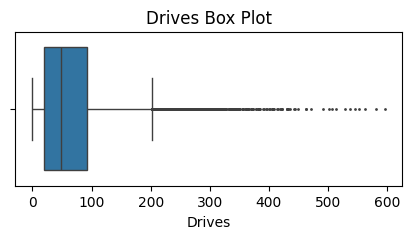

In [41]:
# plot boxplot
plt.figure(figsize = (5,2))
sns.boxplot(x = waze_df['drives'], fliersize = 1)
plt.title('Drives Box Plot')
plt.xlabel('Drives')
plt.show()

The box plot indicates a number of outliers in our variable

we'll use the `IQR` to isolate the outlier drives in our data and further probe the data

In [74]:
# first calculate IQR 
Q1 = waze_df['drives'].quantile(0.25)
Q3 = waze_df['drives'].quantile(0.75)
IQR = Q3 - Q1

# use IQR to calculate the upper and lower limits
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR 

# display all ouliers in our dataset using our limits
mask = (waze_df['drives'] < lower_limit) | (waze_df['drives'] > upper_limit)

outliers = len(waze_df[mask])
print(f"Total number of outliers: {outliers}")
print()
waze_df[mask]

Total number of outliers: 734



,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
17,17,churned,272,219,564.271485,88,0,90,3529.338980,2078.426838,11,11,Android
33,33,retained,291,233,568.722765,275,39,9,2578.720200,1703.292389,15,15,iPhone
63,63,retained,253,203,298.673647,1546,0,88,4695.169432,2146.467081,6,1,iPhone
88,88,retained,306,246,320.257531,2252,60,0,3595.562658,2420.119875,28,20,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14929,14929,retained,319,257,324.308061,1275,74,83,7403.931302,1574.746539,26,19,iPhone
14942,14942,retained,299,239,446.971336,1378,141,12,4279.228490,1950.297408,12,8,iPhone
14946,14946,retained,326,261,745.443028,1743,42,49,5129.332913,2034.523337,14,7,iPhone
14968,14968,churned,333,267,623.280582,3260,28,24,2004.258095,1522.307713,10,7,Android


In [75]:
# check max drives in outlier set
waze_df[mask]['drives'].max()

596

our drives variable has a total of 734 outlier rows, with the highest being 596, which implies an average of almost 20 drives per day. This is not impossible but could be an error.

The best course of action would be to inquire from our manager or stakeholders if there is a reason for this number of outliers and how best to proceed

However, for the purpose of this project we will proceed with our hypothesis test without removing outlier values

**Note:** In the dataset, `device` is a categorical variable with the labels `iPhone` and `Android`.

In order to perform this analysis, we must turn each label into an integer.  The following code assigns a `1` for an `iPhone` user and a `2` for `Android`.

**Note:** Creating a new variable is ideal so that we don't overwrite original data. One way to do this is by:




1. Creating a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values we want to convert them to (`2` and `1`) as values.

2. Creating a new column called `device_type` that is a copy of the `device` column and mapping it to the values of our `map_dictionary` using the `map()` method.

In [79]:
# 1. Create `map_dictionary`
map_dictionary = {'iPhone':1, 'Android':2}


# 2. Create new `device_type` column for our mapped data
waze_df['device_type'] = waze_df['device'].map(map_dictionary)


# There's another way to do this using the np.where() method shown in the comment below

#waze_df['device_type'] = np.where(waze_df['device'] == 'iPhone', 1, 2)


waze_df[['device', 'device_type']].head()


,device,device_type
0,Android,2
1,iPhone,1
2,Android,2
3,iPhone,1
4,Android,2


we are interested in the relationship between device type and the number of drives. One approach is to look at the average number of drives for each device type. Calculate these averages.

In [83]:
# print device type mean drives
waze_df.groupby('device')['drives'].mean().sort_values(ascending = False)


device
iPhone     67.859078
Android    66.231838
Name: drives, dtype: float64

Based on the averages shown, it appears that drivers who use an iPhone device to interact with the application have a slightly higher number of drives on average. However, this difference might arise from random sampling, rather than being a true difference in the number of drives. To assess whether the difference is statistically significant, we can conduct a hypothesis test.

## Task 3. Statistical Tests

Before we proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis: leadership wants to know if there is a statistically significant difference in mean amount of drives between iPhone® users and Android™ users

Before proceeding with our analysis, it will be helpful to subset the data for our comparison.

In [66]:
# 1. Isolate the `drives` column for iPhone users.
iPhone_drives = waze_df[waze_df['device_type'] == 1]['drives']


# 2. Isolate the `drives` column for Android users.
Android_drives = waze_df[waze_df['device_type'] == 2]['drives']


print(iPhone_drives.mean())
print(Android_drives.mean())


67.85907775020678
66.23183780739629


#### Formulate hypothesis:

**Formulate null and alternative hypotheses:**

*   $H_0$: There is no difference in the mean amount of drives between iPhone users and Android Users
*   $H_A$: There is a difference in the mean amount of drives between iPhone users and Android users


#### Set the significance level:

In [56]:
# For this analysis, the significance level is 5%
SL = 5 / 100
print(f'Significance Level: {SL}')

Significance Level: 0.05


#### Determine the appropriate test procedure:

Here, we are comparing the sample means between two independent samples. Therefore, we will utilize a **two-sample  𝑡-test**.

#### Compute the P-value

In [60]:
stats.ttest_ind(a = iPhone_drives, b = Android_drives, equal_var = False)

TtestResult(statistic=1.463523206885235, pvalue=0.14335197268020597, df=11345.066049381952)

- From our test we obtained a p value of 0.14 which is greater than our significance level of 0.05
- Since our p value is greater than our significance level, we fail to reject the null hypothesis, and therefore conclude that there is no statistically significant difference in the mean amount of drives between iPhone users and Android users